In [ ]:
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

In [1]:
import gym
import random

In [2]:
env=gym.make('Acrobot-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n
actions

3

In [3]:
states

6

In [19]:
episodes =5
for episode in range(1, episodes+1):
  state = env.reset()
  done = False
  score = 0
  while not done:
    env.render()
    action = random.choice([0,1])
    n_state, reward, done, info = env.step(action)
    score+=reward
  print('Episode:{} Score:{}'.format(episode,score)) 

Episode:1 Score:-500.0
Episode:2 Score:-500.0
Episode:3 Score:-500.0
Episode:4 Score:-500.0
Episode:5 Score:-500.0


In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [13]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model

In [14]:
model = build_model(states,actions)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                168       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 843
Trainable params: 843
Non-trainable params: 0
_________________________________________________________________


In [27]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [28]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                    nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [29]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3),metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize= False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -0.9944
56 episodes - episode_reward: -176.143 [-292.000, -112.000] - loss: 0.656 - mae: 25.629 - mean_q: -37.236

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: -0.9944
56 episodes - episode_reward: -178.000 [-467.000, -112.000] - loss: 0.657 - mae: 25.082 - mean_q: -36.510

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 59s 6ms/step - reward: -0.9942
58 episodes - episode_reward: -170.690 [-284.000, -101.000] - loss: 0.743 - mae: 25.425 - mean_q: -37.013

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 59s 6ms/step - reward: -0.9943
57 episodes - episode_reward: -174.298 [-293.000, -115.000] - loss: 0.791 - mae: 25.170 - mean_q: -36.612

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 59s 6ms/step 

In [25]:
scores = dqn.test(env, nb_episodes=100, visualize= False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -108.000, steps: 109
Episode 2: reward: -86.000, steps: 87
Episode 3: reward: -110.000, steps: 111
Episode 4: reward: -176.000, steps: 177
Episode 5: reward: -74.000, steps: 75
Episode 6: reward: -98.000, steps: 99
Episode 7: reward: -88.000, steps: 89
Episode 8: reward: -76.000, steps: 77
Episode 9: reward: -93.000, steps: 94
Episode 10: reward: -94.000, steps: 95
Episode 11: reward: -91.000, steps: 92
Episode 12: reward: -85.000, steps: 86
Episode 13: reward: -95.000, steps: 96
Episode 14: reward: -117.000, steps: 118
Episode 15: reward: -108.000, steps: 109
Episode 16: reward: -108.000, steps: 109
Episode 17: reward: -75.000, steps: 76
Episode 18: reward: -171.000, steps: 172
Episode 19: reward: -93.000, steps: 94
Episode 20: reward: -71.000, steps: 72
Episode 21: reward: -103.000, steps: 104
Episode 22: reward: -63.000, steps: 64
Episode 23: reward: -109.000, steps: 110
Episode 24: reward: -70.000, steps: 71
Episode 25: reward: -81.00

In [26]:
_ = dqn.test(env, nb_episodes=10, visualize= True)

Testing for 10 episodes ...
Episode 1: reward: -101.000, steps: 102
Episode 2: reward: -87.000, steps: 88
Episode 3: reward: -69.000, steps: 70
Episode 4: reward: -71.000, steps: 72
Episode 5: reward: -83.000, steps: 84
Episode 6: reward: -69.000, steps: 70
Episode 7: reward: -85.000, steps: 86
Episode 8: reward: -74.000, steps: 75
Episode 9: reward: -100.000, steps: 101
Episode 10: reward: -101.000, steps: 102


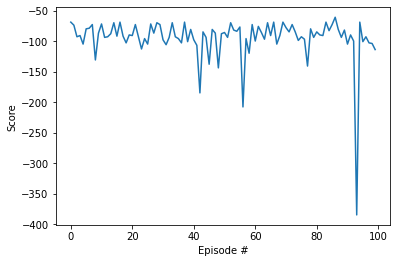

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores.history['episode_reward'])), scores.history['episode_reward'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()